In [1]:
import pathlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pvlib as pvl
import seaborn as sns
sns.set(font_scale=1.5, rc={'figure.figsize': (12, 8)})

In [2]:
DRA_TMY3_FILE = pathlib.Path('../../SURFRAD/TMY/723870TYA.CSV')
DRA_TMY3 = pvl.iotools.read_tmy3(DRA_TMY3_FILE)

<AxesSubplot:>

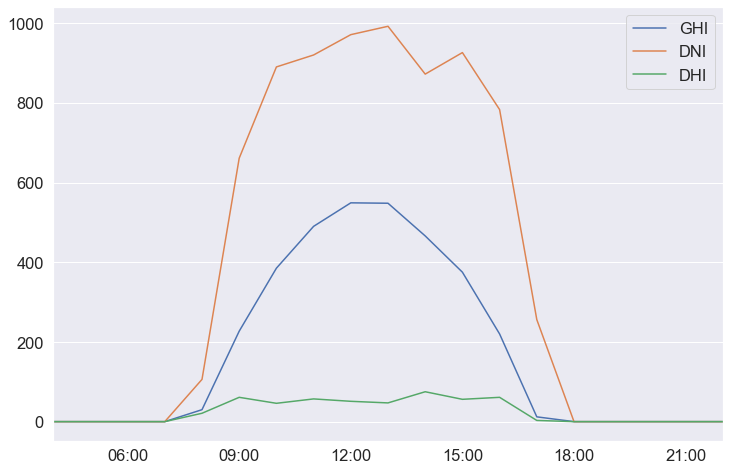

In [3]:
DRA_TMY3[0]['1998-01-07 04:00:00-08:00':'1998-01-07 22:00:00-08:00'][['GHI', 'DNI', 'DHI']].plot()

In [4]:
def read_surfrad_year(surfrad_year_path):
    """
    Parameters
    -----------
    surfrad_year_path : pathlib.Path
        path to folder containing a single year of daily SURFRAD data files
    Returns
    -------
    df : pandas.DataFrame
        All of the daily weather data from folder of single year concatentated
        along time axis
    header : dict
        info about the location, timezone, and station name
    """
    data = [pvl.iotools.read_surfrad(f) for f in surfrad_year_path.iterdir()]
    dfs, heads = zip(*data)
    df = pd.concat(dfs)
    header = heads[0]
    return df, header

surfrad_dir = pathlib.Path('../../SURFRAD')
weather_dir = "Desert_Rock_NV"
weather_path = surfrad_dir / weather_dir
weather_df, weather_header = read_surfrad_year(weather_path / '1998')

<AxesSubplot:>

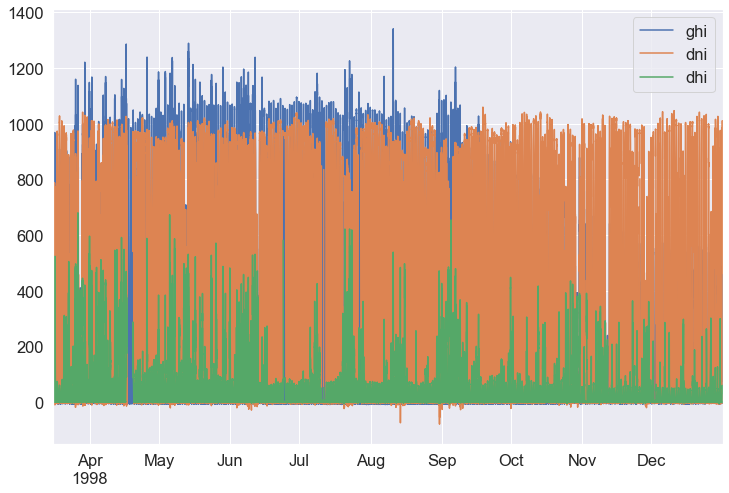

In [5]:
weather_df[['ghi', 'dni', 'dhi']].plot()

In [6]:
weather_df_2005, _ = read_surfrad_year(weather_path / '2005')

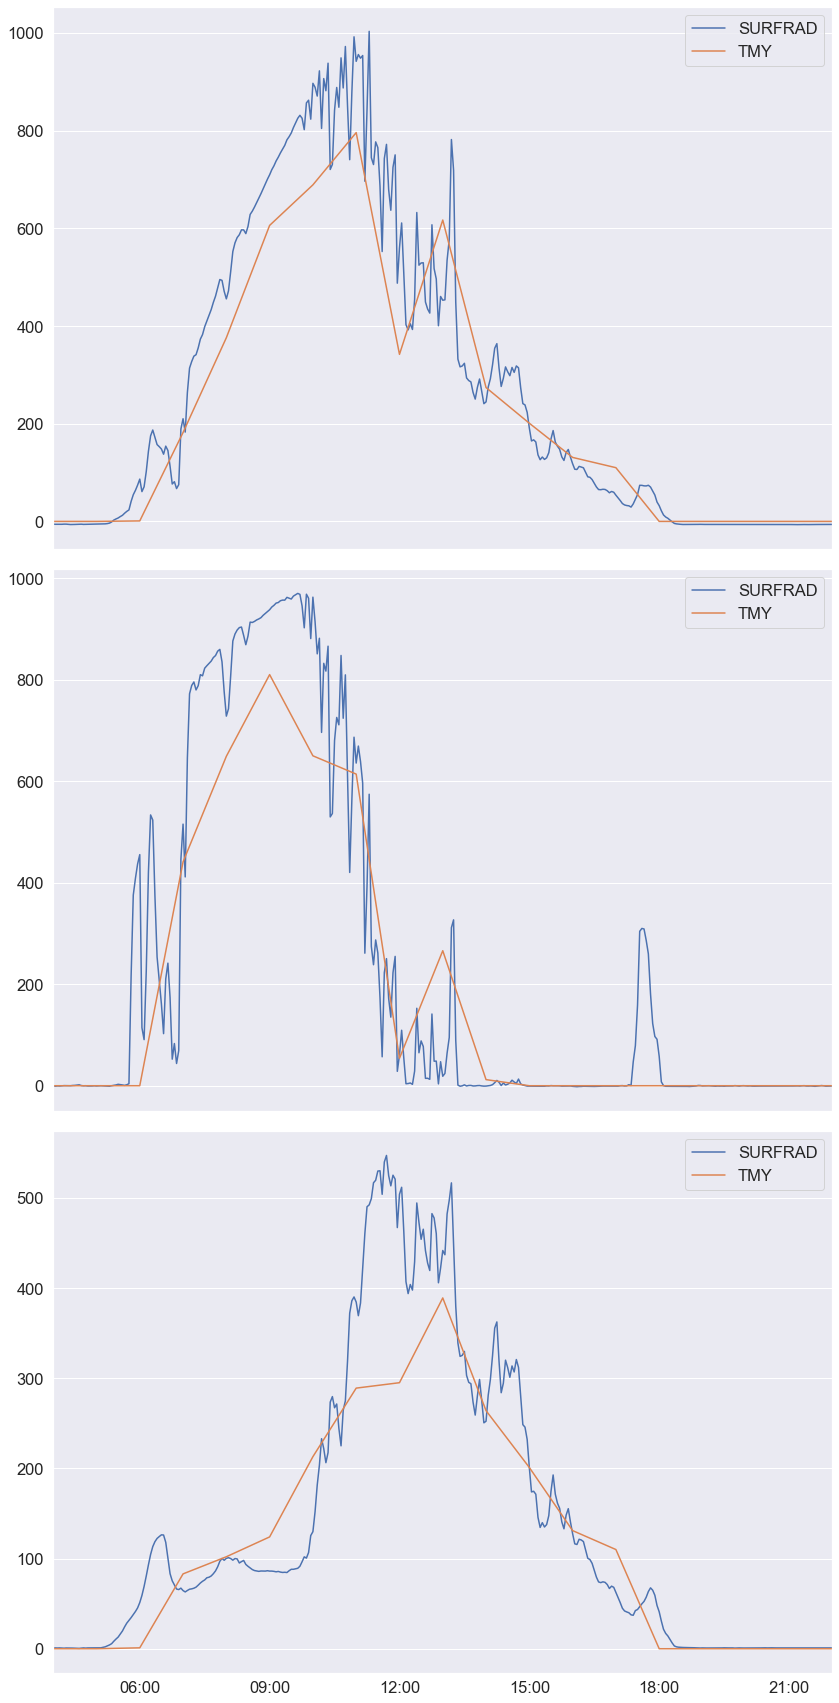

In [7]:
starttime, endtime = '2005-04-07 04:00:00-08:00', '2005-04-07 22:00:00-08:00'
weather_df_2005_PT = weather_df_2005.tz_convert('Etc/GMT+8')
f, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 24))
# ghi
weather_df_2005_PT[starttime:endtime]['ghi'].plot(ax=ax[0], label='SURFRAD')
DRA_TMY3[0][starttime:endtime]['GHI'].plot(ax=ax[0], label='TMY')
ax[0].legend()
# dni
weather_df_2005_PT[starttime:endtime]['dni'].plot(ax=ax[1], label='SURFRAD')
DRA_TMY3[0][starttime:endtime]['DNI'].plot(ax=ax[1], label='TMY')
ax[1].legend()
# dhi
weather_df_2005_PT[starttime:endtime]['dhi'].plot(ax=ax[2], label='SURFRAD')
DRA_TMY3[0][starttime:endtime]['DHI'].plot(ax=ax[2], label='TMY')
ax[2].legend()
f.tight_layout()

In [8]:
DRA_TMY3[0].iloc[90*24:120*24]

,Date (MM/DD/YYYY),Time (HH:MM),ETR,ETRN,GHI,GHISource,GHIUncertainty,DNI,DNISource,DNIUncertainty,...,Alb,AlbSource,AlbUncertainty,Lprecipdepth,Lprecipquantity,LprecipSource,LprecipUncertainty,PresWth,PresWthSource,PresWthUncertainty
2005-04-01 01:00:00-08:00,04/01/2005,01:00,0,0,0,2,0,0,2,0,...,0.19,F,8,0,1,D,9,0,C,8
2005-04-01 02:00:00-08:00,04/01/2005,02:00,0,0,0,2,0,0,2,0,...,0.19,F,8,0,1,D,9,0,C,8
2005-04-01 03:00:00-08:00,04/01/2005,03:00,0,0,0,2,0,0,2,0,...,0.19,F,8,0,1,D,9,0,C,8
2005-04-01 04:00:00-08:00,04/01/2005,04:00,0,0,0,2,0,0,2,0,...,0.19,F,8,0,1,D,9,0,C,8
2005-04-01 05:00:00-08:00,04/01/2005,05:00,0,0,0,2,0,0,2,0,...,0.19,F,8,0,1,D,9,0,C,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-30 20:00:00-08:00,04/30/2005,20:00,0,0,0,2,0,0,2,0,...,0.19,F,8,0,1,D,9,0,C,8
2005-04-30 21:00:00-08:00,04/30/2005,21:00,0,0,0,2,0,0,2,0,...,0.19,F,8,0,1,D,9,0,C,8
2005-04-30 22:00:00-08:00,04/30/2005,22:00,0,0,0,2,0,0,2,0,...,0.19,F,8,0,1,D,9,0,C,8
2005-04-30 23:00:00-08:00,04/30/2005,23:00,0,0,0,2,0,0,2,0,...,0.19,F,8,0,1,D,9,0,C,8


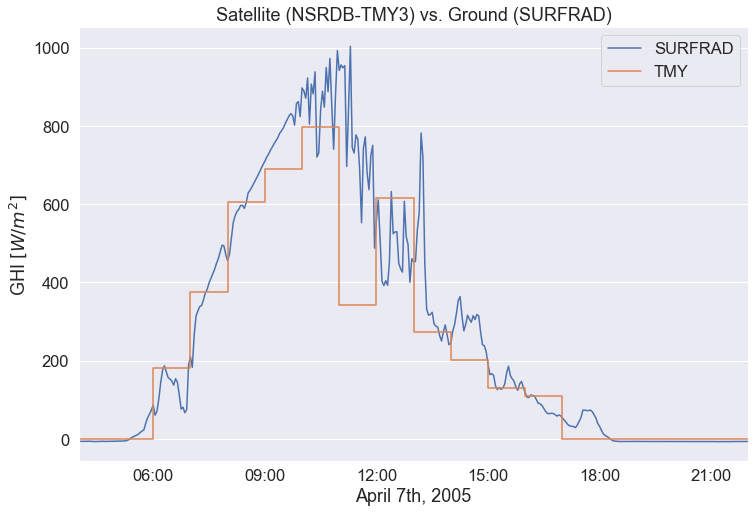

In [9]:
# ghi
ax = weather_df_2005_PT[starttime:endtime]['ghi'].plot(label='SURFRAD')
DRA_TMY3[0][starttime:endtime]['GHI'].plot(ax=ax, label='TMY', drawstyle='steps')
ax.legend()
plt.title('Satellite (NSRDB-TMY3) vs. Ground (SURFRAD)')
plt.ylabel('GHI $[W/m^2]$')
plt.xlabel('April 7th, 2005')
plt.savefig('sat-v-gnd-2005-04.png')